In [2]:
allDataFile = "ratios_with_credit_ratings_all.csv"

import pandas as pd

# Read in the data
allData = pd.read_csv(allDataFile)
allData.dropna(inplace=True)

# Drop column unnamed: 0
allData.drop(allData.columns[0], axis=1, inplace=True)

# Convert long_term_credit_rating to rating ; AAA, AA+, AA, AA-, A+, A, A-, BBB+, BBB, BBB- : 1 and BB+, BB, BB-, B+, B, B-, CCC+, CCC, CCC-, CC, C, D : 0
allData['rating'] = allData['long_term_credit_rating'].apply(lambda x: 1 if x in ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+', 'BBB', 'BBB-'] else 0)

# make dummy variables for industry using gsector
allData = pd.get_dummies(allData, columns=['gsector'], prefix = ['gsector'], drop_first=True)



<AxesSubplot:>

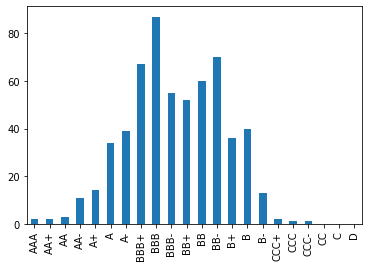

In [4]:
indexes = [
    'AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+', 'BBB', 'BBB-', 'BB+', 'BB', 'BB-', 'B+', 'B', 'B-', 'CCC+', 'CCC', 'CCC-', 'CC', 'C', 'D'
]

allData['long_term_credit_rating'].value_counts().reindex(indexes).plot(kind='bar')

In [2]:
# Split into train validate and test 60/20/20
trainData = allData.sample(frac=0.6, random_state=1)
validateData = allData.drop(trainData.index).sample(frac=0.5, random_state=1)
testData = allData.drop(trainData.index).drop(validateData.index)

# Write out the data
trainData.to_csv("train.csv", index=False)
validateData.to_csv("validate.csv", index=False)
testData.to_csv("test.csv", index=False)
